## Step 1: Download the data

Download data from the web. I am using the sample data that is provided with the project resources. We can also make/create our own data using the simulator provided and then use it to train our model.

Download and then extract the data. Further train using this data.

In [1]:
#AWS

import pickle
import os
from urllib.request import urlretrieve
from zipfile import ZipFile

def download(url, file):
    """
    Download file from <url>
    :param url: URL to file
    :param file: Local file path
    """
    if not os.path.isfile(file):
        print('Downloading ' + file + '...')
        urlretrieve(url, file)
        print('Download Finished')
        #Unzip the downloaded file to get pickled data
        zip = ZipFile('data.zip')
        zip.extractall()

# Downloading the training and test dataset.
download('https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip', 'data.zip')

# Wait until you see that all files have been downloaded.
print('All files downloaded.')



All files downloaded.


Read the csv file to get the path of the images along with the steering angles.

Here I have augmented the sample data as sample data for turns is less as compared to data for straight line. Also left turn data is more as compared to right turn data. Therefore augmenting by flipping the images which have turns associated with them will help the model train better. Thus implemented the same in the cell below.

(17863, 160, 320, 3)
2511
8037
17863


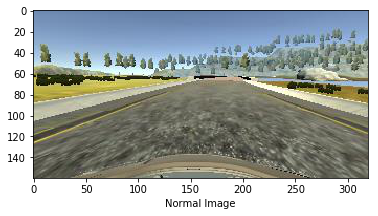

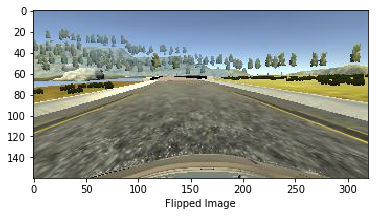

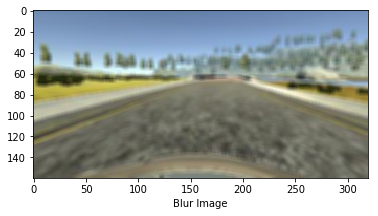

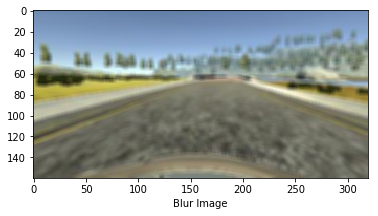

In [18]:
import csv
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import random #


lines =[]
#with open('../Behavioural Cloning Data/driving_log.csv') as csvfile:
with open('data/driving_log.csv') as csvfile:
#with open('../data/driving_log_2.csv') as csvfile:
    reader = csv.reader(csvfile)
    for line in reader:
        lines.append(line)
images=[]
measurements=[]
count=0

test_images = []
test_label= []

for line in lines[1:]:
    source_path = line[0]
    filename = source_path.split('/')[-1]
    current_path = 'data/IMG/' + filename
    #current_path = source_path
    image = cv2.imread(current_path)
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    #print(image.shape)
    images.append(image)
    measurement = float(line[3])
    measurements.append(measurement)
    
    if bool(random.getrandbits(1)):
        kernel = np.ones((5,5),np.float32)/25
        dst = cv2.filter2D(image,-1,kernel)
        images.append(dst)
        measurements.append(measurement)
    
    if (abs(measurement)>0.1):
        count=count+1
        image_flipped = np.fliplr(image)
        measurement_flipped = -measurement
        images.append(image_flipped)
        measurements.append(measurement_flipped)
        images.append(image_flipped)
        measurements.append(measurement_flipped)
        if (count==1):
            plt.imshow(image)
            plt.xlabel('Normal Image')
            plt.figure()
            plt.imshow(image_flipped)
            plt.xlabel('Flipped Image')
            test_images.append(image)
            test_label.append(measurement)
            
            kernel = np.ones((5,5),np.float32)/25
            dst = cv2.filter2D(image,-1,kernel)
            plt.figure()
            plt.imshow(dst)
            plt.xlabel('Blur Image')    
            
            
            blur = cv2.blur(image,(5,5))
            plt.figure()
            plt.imshow(blur)
            plt.xlabel('Blur Image')        
            
    if (abs(measurement)>0.3):
        count=count+1
        image_flipped = np.fliplr(image)
        measurement_flipped = -measurement
        images.append(image_flipped)
        measurements.append(measurement_flipped)
        images.append(image)
        measurements.append(measurement)
        
        
        #left images
        source_path1 = line[1]
        filename1 = source_path1.split('/')[-1]
        current_path1 = 'data/IMG/' + filename1
        #current_path = source_path
        image1 = cv2.imread(current_path1)
        image1 = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        images.append(image1)
        measurement = float(line[3])
        measurement = measurement + 0.7
        measurements.append(measurement)
        
        
        #right images
        source_path2 = line[2]
        filename2 = source_path2.split('/')[-1]
        current_path2 = 'data/IMG/' + filename2
        #current_path = source_path
        image2 = cv2.imread(current_path2)
        image2 = cv2.cvtColor(image2,cv2.COLOR_BGR2RGB)
        #print(image.shape)
        images.append(image2)
        measurement = float(line[3])
        measurement = measurement - 0.7
        measurements.append(measurement)
        
    
X_train = np.array(images)
y_train = np.array(measurements)
'''X_train = np.array(X_train)
y_train = np.array(y_train)'''
print (X_train.shape)
print(count)
print(len(lines))
print(len(images))

C:\Users\aakash.gupta\AppData\Local\Continuum\Miniconda3\envs\carnd-term1\lib\site-packages\skimage\transform\_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


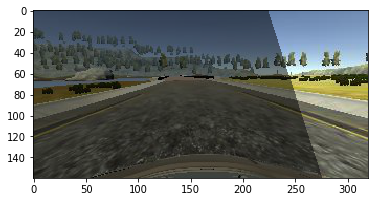

In [37]:
from skimage import data, io, filters, transform

image_new = X_train[100]

h, w = image_new.shape[0], image_new.shape[1]
[x1, x2] = np.random.choice(w, 2, replace=False)
k = h / (x2 - x1)
b = - k * x1
for i in range(h):
    c = int((i - b) / k)
    image_new[i, :c, :] = (image_new[i, :c, :] * .5).astype(np.int32)
    
image_new = skimage.transform.resize(image_new, (160, 320, 3))

plt.imshow(image_new)

In [38]:
'''from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True)
datagen.fit(test_images)
# configure batch size and retrieve one batch of images'''



'''for X_batch, y_batch in datagen.flow(test_images, test_label, batch_size=1):
# create a grid of 3x3 images
    for i in range(0, 9):
        pyplot.subplot(330 + 1 + i)
        pyplot.imshow(X_batch[i].reshape(160,320), cmap=pyplot.get_cmap('gray'))
    # show the plot
    pyplot.show()
    break'''

"for X_batch, y_batch in datagen.flow(test_images, test_label, batch_size=1):\n# create a grid of 3x3 images\n    for i in range(0, 9):\n        pyplot.subplot(330 + 1 + i)\n        pyplot.imshow(X_batch[i].reshape(160,320), cmap=pyplot.get_cmap('gray'))\n    # show the plot\n    pyplot.show()\n    break"

## Step 2: Design and Test a Model Architecture

Model architecture summary is available at the end of the next block. It is implemented using model.summary() method.

I have used model implemented by nvidia for autonomous vehicle for my project. I belive my model is similar yet very much different. The similarity is in the number of convolution layers in both the models. Rest almost everything is different, which includes dense layers, maxpool layers, number of filter in convolution layer. I have tuned the hyper-parameters to train my model.

Before finalizing this model I also tried one another famous model - The LeNet achitecture. But the one I am using is working better so shifted to this one.
### Cropping
It is also seen that in track 1 some top portion of the images can be edited as it is basically comprised of trees and the hills. These things won't help that much to train our network. Thus cropping them and using the rest of the image to train the model.


### Activation
ELU activaion is used in the model to maintain the non-linearity.

### Optimizer
I have used AdamOptimizer as it is seen that it it changes learning rate efficiently as compared to others and help us train neural network faster and quicker.

### Zero mean
The sample data has been zero meaned as it helps to train the model faster and quickly as optimization is faster for this type of data 


### Training and test data set
The sample data is split into the training and validation data set. It is split in the ratio of 8:2. It could also have been split in the ratio of 7:3. Both of these are good ratios for splitting the data into training and validation data set.

I am training my model for 1 epoch so I am not using dropout as one of the techniques for overfitting of data.

In [39]:
%config IPCompleter.greedy=True
from keras.models import Sequential
from keras.layers import Flatten, Dense, Lambda, Activation
from keras.layers import Convolution2D, Cropping2D
from keras.layers.pooling import MaxPooling2D

model = Sequential()
#normalization
model.add(Lambda(lambda x:x/255.0-0.5,input_shape=(160,320,3)))
model.add(Cropping2D(cropping=((75,25),(0,0))))


#Layer 1: Convolution
model.add(Convolution2D(6, 5, 5,border_mode='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('elu'))


#Layer 2: Convolution
model.add(Convolution2D(16, 5, 5,border_mode='valid'))
model.add(MaxPooling2D((2, 2)))
model.add(Activation('elu'))

#Layer 3: Convolution
model.add(Convolution2D(18, 5, 5,border_mode='valid'))
model.add(MaxPooling2D((1, 2)))
model.add(Activation('elu'))

#Layer 4: Convolution
model.add(Convolution2D(20, 3, 3,border_mode='valid'))
model.add(MaxPooling2D((1, 2)))
model.add(Activation('relu'))

#Layer 5: Convolution
model.add(Convolution2D(8, 3, 3,border_mode='valid'))
#model.add(MaxPooling2D((2, 2)))
model.add(Activation('elu'))

#Flatten
model.add(Flatten())
#Dense layer 1
model.add(Dense(400))
model.add(Activation('elu'))
#Dense layer 2
model.add(Dense(200))
model.add(Activation('elu'))
#Dense layer 3
model.add(Dense(80))
model.add(Activation('elu'))
#Dense layer 4
model.add(Dense(1))

model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
lambda_2 (Lambda)                (None, 160, 320, 3)   0           lambda_input_2[0][0]             
____________________________________________________________________________________________________
cropping2d_2 (Cropping2D)        (None, 60, 320, 3)    0           lambda_2[0][0]                   
____________________________________________________________________________________________________
convolution2d_6 (Convolution2D)  (None, 56, 316, 6)    456         cropping2d_2[0][0]               
____________________________________________________________________________________________________
maxpooling2d_5 (MaxPooling2D)    (None, 28, 158, 6)    0           convolution2d_6[0][0]            
___________________________________________________________________________________________

In [42]:
'''import pydot
from keras.utils.visualize_util import plot
plot(model, to_file='model.png')'''

"import pydot\nfrom keras.utils.visualize_util import plot\nplot(model, to_file='model.png')"

In [45]:
'''import pydot
from IPython.display import SVG
from keras.utils.visualize_util import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))'''

"import pydot\nfrom IPython.display import SVG\nfrom keras.utils.visualize_util import model_to_dot\n\nSVG(model_to_dot(model).create(prog='dot', format='svg'))"

In [47]:
import pydot
#from graphviz
from keras.utils import plot_model
plot_model(model, to_file='model.png')

ImportError: cannot import name 'plot_model'

## Training the model

Train the model to get the model.h5 file.

I have not used generators as my model was working fine.

In [24]:
model.compile(loss='mse', optimizer='adam')
model.fit(X_train,y_train, validation_split=0.2, shuffle=True, nb_epoch=2)

model.save('model.h5')

print('Done')

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Train on 14290 samples, validate on 3573 samples
Epoch 1/2
14290/14290 [==============================] - 605s - loss: 0.0415 - val_loss: 0.0352
Epoch 2/2
14290/14290 [==============================] - 485s - loss: 0.0338 - val_loss: 0.0363
Done



## Step 4: Validation
Once the training is done, validation in performed using the simulator provided in the resources.